In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("IntroToPy/mountains_db.tsv", delimiter="\t" , encoding="utf-8" ,header=None , names=["Nume", "Altitudine", "Tara" , 'cod ISO'])

In [2]:
numar_tari = df['cod ISO'].nunique()
print(f"Numărul total de țări: {numar_tari}")

Numărul total de țări: 256


In [3]:
numar_munti_fara_altitudine = df['Altitudine'].isna().sum()
print(f"Numărul de munți fără informație de altitudine: {numar_munti_fara_altitudine}")

Numărul de munți fără informație de altitudine: 84586


In [4]:
altitudini = df['Altitudine'].dropna()
minim = altitudini.min()
maxim = altitudini.max()
media = altitudini.mean()
mediana = altitudini.median()
deviatia_std = altitudini.std()
print(f"Altitudine minimă: {minim}")
print(f"Altitudine maximă: {maxim}")
print(f"Altitudine medie: {media}")
print(f"Altitudine mediană: {mediana}")
print(f"Abatere standard: {deviatia_std}")

Altitudine minimă: 0.0
Altitudine maximă: 8172.0
Altitudine medie: 1286.2325302904874
Altitudine mediană: 984.0
Abatere standard: 1109.2874014093068


In [5]:
topN = 10
top_munti = df[['Nume', 'Altitudine']].dropna().sort_values(by='Altitudine', ascending=False).head(topN)
print(f"Cei mai înalți {topN} munți din lume:")
print(top_munti)

Cei mai înalți 10 munți din lume:
                         Nume  Altitudine
37020              Dhaulagiri      8172.0
37042                 Manaslu      8163.0
43563            Nanga Parbat      8125.0
37027               Annapurna      8091.0
101370        Xixabangma Peak      8012.0
43564          Nanga Mountain      8000.0
4358    Kanchenjunga Mountain      8000.0
37066                  Nuptse      7879.0
43635              Masherbrum      7821.0
4315               Nanda Devi      7817.0


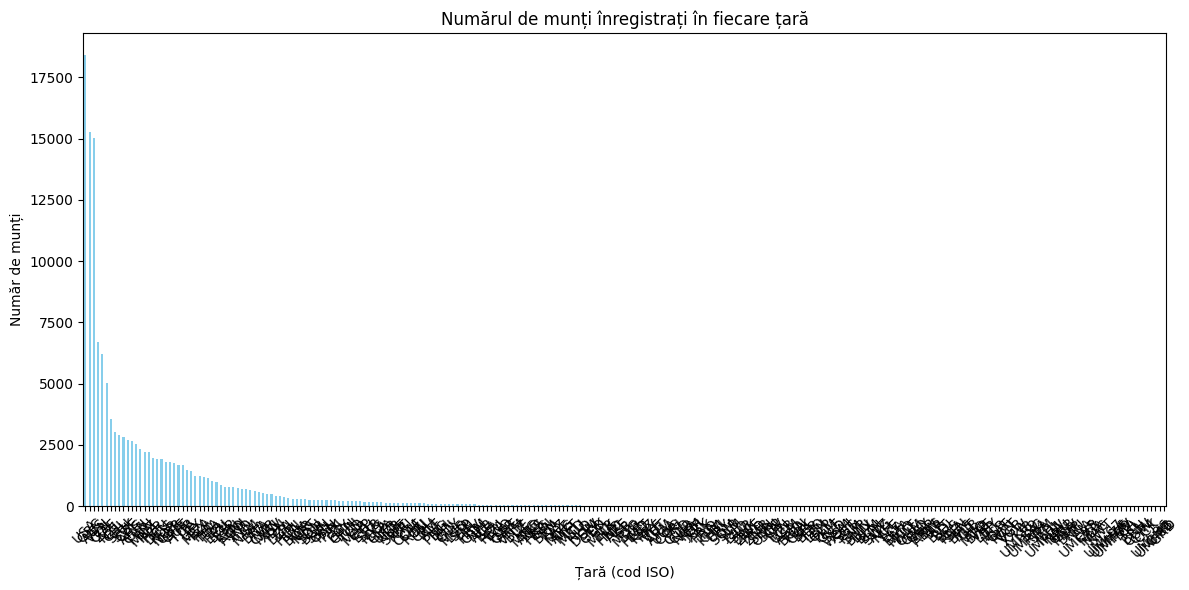

In [9]:
munți_pe_țară = df['cod ISO'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
munți_pe_țară.plot(kind='bar', color='skyblue')
plt.xlabel("Țară (cod ISO)")
plt.ylabel("Număr de munți")
plt.title("Numărul de munți înregistrați în fiecare țară")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

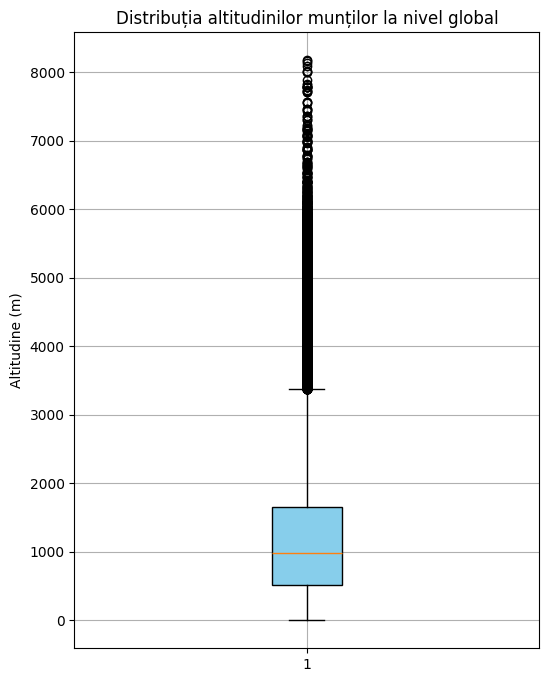

In [10]:
altitudini = df['Altitudine'].dropna()
plt.figure(figsize=(6, 8))
plt.boxplot(altitudini, vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Distribuția altitudinilor munților la nivel global")
plt.ylabel("Altitudine (m)")
plt.grid(True)
plt.show()

/tmp/ipykernel_4706/976140643.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(altitudini_per_tara, patch_artist=True, labels=tari)


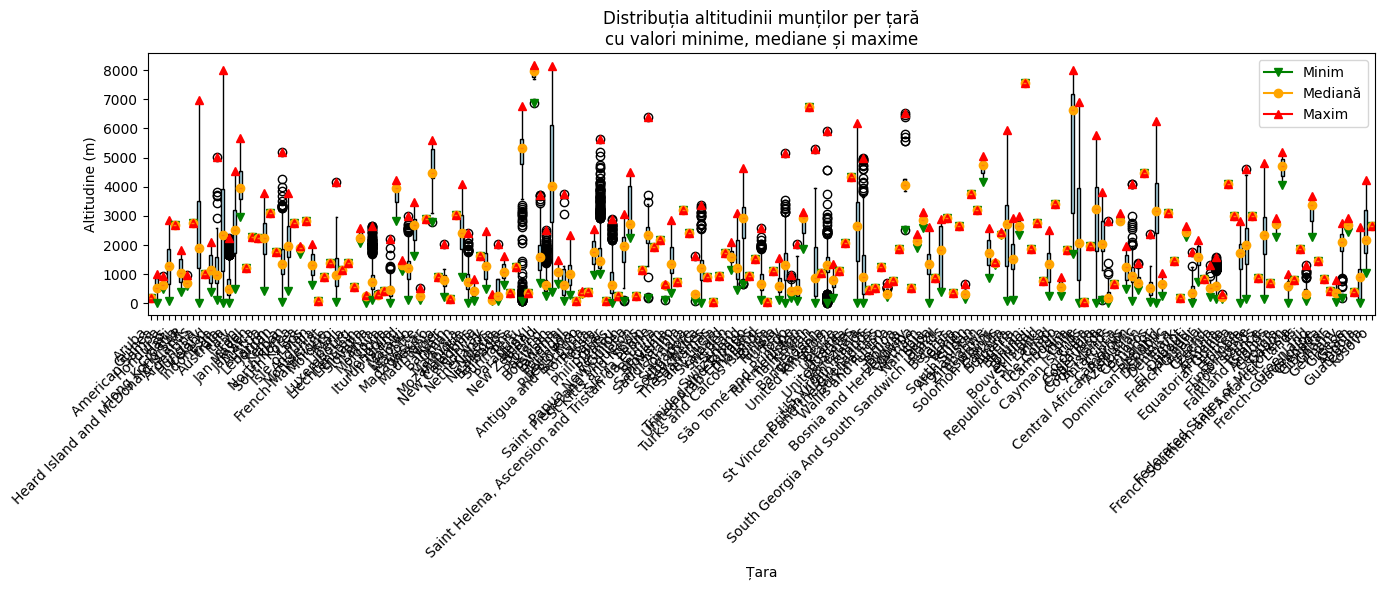

In [11]:
df = df[['Tara', 'Altitudine']].dropna()
tari = df['Tara'].unique()
altitudini_per_tara = [df[df['Tara'] == tara]['Altitudine'].tolist() for tara in tari]
statistici = df.groupby('Tara')['Altitudine'].agg(['min', 'median', 'max'])
plt.figure(figsize=(14, 6))
box = plt.boxplot(altitudini_per_tara, patch_artist=True, labels=tari)
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
for i, tara in enumerate(tari):
    plt.plot(i + 1, statistici.loc[tara, 'min'], marker='v', color='green', label='Minim' if i == 0 else "")
    plt.plot(i + 1, statistici.loc[tara, 'median'], marker='o', color='orange', label='Mediană' if i == 0 else "")
    plt.plot(i + 1, statistici.loc[tara, 'max'], marker='^', color='red', label='Maxim' if i == 0 else "")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Altitudine (m)")
plt.xlabel("Țara")
plt.title("Distribuția altitudinii munților per țară\ncu valori minime, mediane și maxime")
plt.legend()
plt.tight_layout()
plt.show()